In [43]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [2]:
X,y=make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


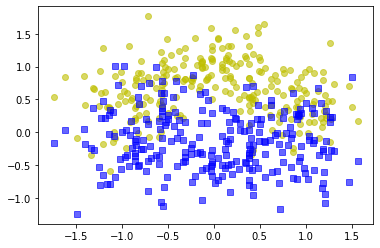

In [3]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha=0.6)
plt.plot(X[:,0][y==0],X[:,1][y==1],'bs',alpha=0.6)

# 投票策略：软投票与硬投票
* 硬投票：直接用类别值，少数服从多数
* 软投票：各自分类器的概率值进行加权平均

### 硬投票

In [4]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#实例化
rf_clf=RandomForestClassifier(random_state=42)
lr_clf=LogisticRegression(random_state=42)
svm_clf=SVC(random_state=42)
hard_clf=VotingClassifier(estimators=[('lr',lr_clf),('rf',rf_clf),('svc',svm_clf)],voting='hard')

#训练
from sklearn.metrics import accuracy_score
for clf in (rf_clf,lr_clf,svm_clf,hard_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_pred,y_test))

RandomForestClassifier 0.896
LogisticRegression 0.864
SVC 0.896
VotingClassifier 0.912


### 软投票

In [5]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#实例化
rf_clf=RandomForestClassifier(random_state=42)
lr_clf=LogisticRegression(random_state=42)
svm_clf=SVC(probability=True,random_state=42)
soft_clf=VotingClassifier(estimators=[('lr',lr_clf),('rf',rf_clf),('svc',svm_clf)],voting='soft')

#训练
from sklearn.metrics import accuracy_score
for clf in (rf_clf,lr_clf,svm_clf,soft_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_pred,y_test))

RandomForestClassifier 0.896
LogisticRegression 0.864
SVC 0.896
VotingClassifier 0.92


 ## Bagging

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#实例化
bag_clf=BaggingClassifier(base_estimator=DecisionTreeClassifier()
                          ,n_estimators=100
                          ,max_samples=0.8
                          ,bootstrap=True
                          ,n_jobs=-1
                          ,random_state=42
                          )
dt_clf=DecisionTreeClassifier(random_state=42)

#训练
for clf in (bag_clf,dt_clf):
    clf.fit(X_train,y_train)
    clf.pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_pred,y_test))

BaggingClassifier 0.92
DecisionTreeClassifier 0.92


## bagging和决策树对比

In [50]:
from matplotlib.colors import ListedColormap
import numpy as np 
#定义一个决策边界函数
def plot_decision_boundary(clf,X,y,axes=[-1.5,2.5,-1,1.5],alpha=0.5,contour=True):
    #生成一个随机的[-1.5，2.5]和[-1,1.5]的100个数
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    #把这个100个数转化为对应的坐标x，y，其中x1，x2分别是100行，100列的矩阵，meshgrid函数的作用就是将x1s，x2s中的每个数据组成一个新矩阵
    x1,x2=np.meshgrid(x1s,x2s)
    #np.c函数作用将x，y按行放在一起行数不变，ravel()函数将矩阵元素逐一排列为一行
    X_new=np.c_[x1.ravel(),x2.ravel()] #X_new即为10000行2列的矩阵对应10000个（x，y）坐标
    #将预测值转化为100行100列
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['#fafab0','#9898ff','#17becf'])
    #contour和contourf都是画三维等高线图的，不同点在于contourf会对等高线间的区域进行填充
    plt.contourf(x1,x2,y_pred,cmap=custom_cmap,alpha=0.3)
    if contour:
        custom_camp2=ListedColormap(['#7d7d58','#4c4c7f','#5O7d5O'])
        plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha=0.6)
        plt.plot(X[:,0][y==0],X[:,1][y==1],'bs',alpha=0.6)
        plt.axis(axes)
        plt.xlabel('x1')
        plt.xlabel('x2')

Text(0.5, 1.0, 'Decision Tree With Bagging')

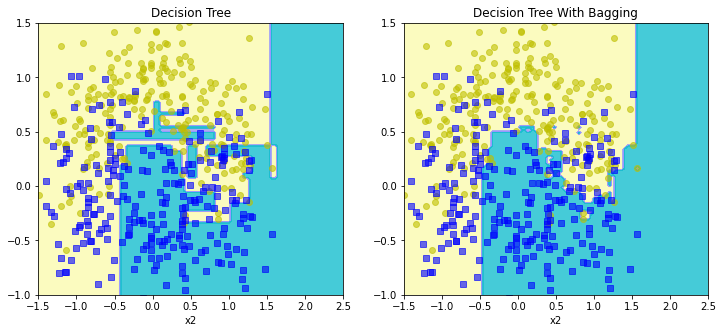

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_decision_boundary(dt_clf,X,y)
plt.title('Decision Tree')
plt.subplot(122)
plot_decision_boundary(bag_clf,X,y)
plt.title('Decision Tree With Bagging')

## OOB策略
* Out Of Bag

In [9]:
bag_clf=BaggingClassifier(base_estimator=DecisionTreeClassifier()
                          ,n_estimators=100
                          ,max_samples=0.9
                          ,bootstrap=True
                          ,n_jobs=-1
                          ,random_state=20
                          ,oob_score=True
                          )
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9013333333333333

In [10]:
y_pred=bag_clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.896

In [11]:
bag_clf.oob_decision_function_

array([[0.47058824, 0.52941176],
       [0.4047619 , 0.5952381 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08333333, 0.91666667],
       [0.36111111, 0.63888889],
       [0.0212766 , 0.9787234 ],
       [1.        , 0.        ],
       [0.97368421, 0.02631579],
       [0.70454545, 0.29545455],
       [0.        , 1.        ],
       [0.65853659, 0.34146341],
       [0.89189189, 0.10810811],
       [1.        , 0.        ],
       [0.08695652, 0.91304348],
       [0.        , 1.        ],
       [0.97727273, 0.02272727],
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.04545455, 0.95454545],
       [0.42857143, 0.57142857],
       [0.87234043, 0.12765957],
       [1.        , 0.        ],
       [0.95      , 0.05      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.69047619, 0.30952381],
       [0.

## 随机森林

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
from sklearn.datasets import load_iris
iris=load_iris()
rf_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rf_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.10080964029590193
sepal width (cm) 0.024902012183599505
petal length (cm) 0.43745986007185284
petal width (cm) 0.43682848744864566


In [14]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml("mnist_784")

In [15]:
rf_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(mnist['data'],mnist['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [16]:
rf_clf.feature_importances_.shape

(784,)

In [17]:
import matplotlib
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=matplotlib.cm.hot)
    plt.axis('off')

[Text(1, 0.0, 'Not important'),
 Text(1, 0.009689626118068539, 'Very important')]

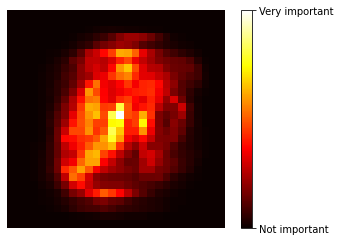

In [18]:
plot_digit(rf_clf.feature_importances_)
char=plt.colorbar(ticks=[rf_clf.feature_importances_.min(),rf_clf.feature_importances_.max()])
char.ax.set_yticklabels(['Not important','Very important'])

## AdaBoost

### 以SVM来演示具体的AdaBoost的基本策略

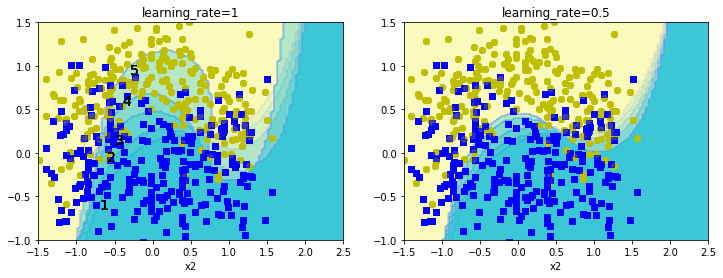

In [51]:
from sklearn .svm import SVC

#计算X_train个数
m=len(X_train)

#画出对比图
plt.figure(figsize=(12,4))
for subplot,learning_rate in ((121,1),(122,0.5)):
    #定义样本权重
    sample_weights=np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        #用svm来作为基分类器进行五次训练
        svm_clf=SVC(kernel='rbf',C=0.05,random_state=42)
        svm_clf.fit(X_train,y_train,sample_weights)
        y_pred=svm_clf.predict(X_train)
        #更新权重
        sample_weights[y_pred!=y_train] *=(1+learning_rate)
        #画出决策边界
        plot_decision_boundary(svm_clf,X,y,alpha=0.6)
        plt.title('learning_rate={}'.format(learning_rate))
        #在第一个子图对应坐标上标上数字1,2,3,4,5
        if subplot==121:
            plt.text(-0.7,-0.65,'1',fontsize=14)
            plt.text(-0.6,-0.10,'2',fontsize=14)
            plt.text(-0.5,0.10,"3",fontsize=14)
            plt.text(-0.4,0.55,'4',fontsize=14)
            plt.text(-0.3,0.90,"5",fontsize=14)
plt.show()

## GBDT

In [60]:
np.random.seed(42)
#随机生成100个0到1的值再减去0.5
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

(100,)

In [63]:
from sklearn.tree import DecisionTreeRegressor
#第一棵树训练
tree_reg1=DecisionTreeRegressor()
tree_reg1.fit(X,y)
#第二棵树训练
y2=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor()
tree_reg2.fit(X,y2)
#第三棵树训练
y3=y-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor()
tree_reg3.fit(X,y2)

DecisionTreeRegressor()

In [70]:
#拿个值来测试下
X_new=np.array([[0.8]])
y_pred=sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))
y_pred

array([0.75026781])

### 通过图看具体的拟合过程

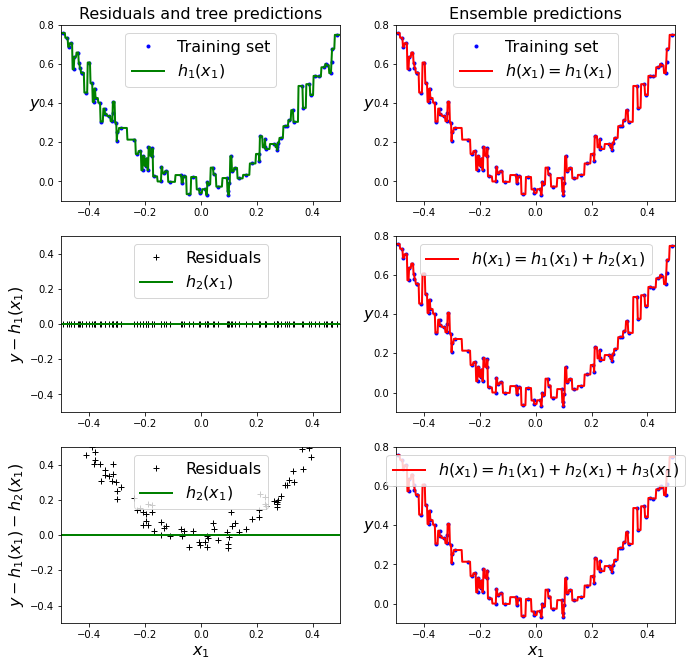

In [73]:
def plot_predictions(regressors,X,y,axes,label=None,style='r-',data_style='b.',data_label=None):
    x1=np.linspace(axes[0],axes[1],500)
    y_pred=sum(regressor.predict(x1.reshape(-1,1))for regressor in regressors)
    plt.plot(X[:,0],y,data_style,label=data_label)
    plt.plot(x1,y_pred,style,linewidth=2,label=label)
    if label or data_label:
        plt.legend(loc='upper center',fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1],X,y,axes=[-0.5,0.5,-0.1,0.8],label='$h_1(x_1)$',style="g-",data_label='Training set')
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.title("Residuals and tree predictions",fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1],X,y,axes=[-0.5,0.5,-0.1,0.8],label='$h(x_1)=h_1(x_1)$',data_label='Training set')
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.title("Ensemble predictions",fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2],X,y2,axes=[-0.5,0.5,-0.5,0.5],label='$h_2(x_1)$',style="g-",data_style="k+",data_label='Residuals')
plt.ylabel("$y-h_1(x_1)$",fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1,tree_reg2],X,y,axes=[-0.5,0.5,-0.1,0.8],label='$h(x_1)=h_1(x_1)+h_2(x_1)$')
plt.ylabel("$y$",fontsize=16,rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3],X,y3,axes=[-0.5,0.5,-0.5,0.5],label='$h_2(x_1)$',style="g-",data_style="k+",data_label='Residuals')
plt.ylabel("$y-h_1(x_1)-h_2(x_1)$",fontsize=16)
plt.xlabel("$x_1$",fontsize=16)


plt.subplot(326)
plot_predictions([tree_reg1,tree_reg2,tree_reg3],X,y,axes=[-0.5,0.5,-0.1,0.8],label='$h(x_1)=h_1(x_1)+h_2(x_1)+h_3(x_1)$')
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.xlabel("$x_1$",fontsize=16)

plt.show()

## 集成参数对比分析

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_depth=2
                             ,n_estimators=3
                             ,learning_rate=1.0
                             ,random_state=41
                             )
gbr.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=41)

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_1=GradientBoostingRegressor(max_depth=2
                             ,n_estimators=3
                             ,learning_rate=0.1
                             ,random_state=41
                             )
gbr_1.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=41)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_2=GradientBoostingRegressor(max_depth=2
                             ,n_estimators=200
                             ,learning_rate=0.1
                             ,random_state=41
                             )
gbr_2.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=41)

Text(0.5, 1.0, 'learning_rate0.1,n_estimators3')

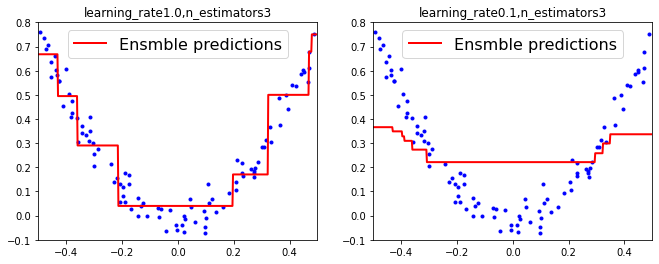

In [96]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_predictions([gbr],X,y,axes=[-0.5,0.5,-0.1,0.8],label='Ensmble predictions')
plt.title('learning_rate{},n_estimators{}'.format(gbr.learning_rate,gbr.n_estimators))

plt.subplot(122)
plot_predictions([gbr_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label='Ensmble predictions')
plt.title('learning_rate{},n_estimators{}'.format(gbr_1.learning_rate,gbr_1.n_estimators))

Text(0.5, 1.0, 'learning_rate0.1,n_estimators200')

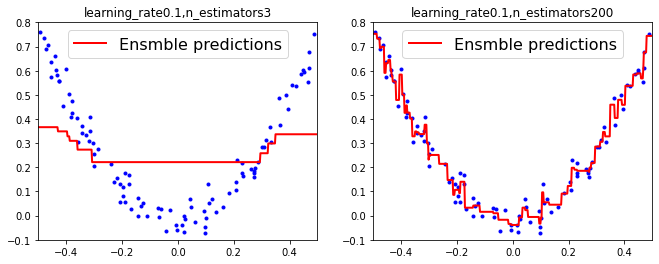

In [97]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_predictions([gbr_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label='Ensmble predictions')
plt.title('learning_rate{},n_estimators{}'.format(gbr_1.learning_rate,gbr_1.n_estimators))

plt.subplot(122)
plot_predictions([gbr_2],X,y,axes=[-0.5,0.5,-0.1,0.8],label='Ensmble predictions')
plt.title('learning_rate{},n_estimators{}'.format(gbr_2.learning_rate,gbr_2.n_estimators))

## 提前停止策略

In [106]:
from sklearn.metrics import mean_squared_error
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=49)
gbr=GradientBoostingRegressor(max_depth=2
                             ,n_estimators=200
                             ,learning_rate=0.1
                             ,random_state=42
                             )
gbr.fit(X_train,y_train)
errors=[mean_squared_error(y_val,y_pred) for y_pred in gbr.staged_predict(X_val)]
best_n_estimators=np.argmin(erros)
best_n_estimators

gbr_best=GradientBoostingRegressor(max_depth=2
                             ,n_estimators=best_n_estimators
                             ,learning_rate=0.1
                             ,random_state=42
                             )
gbr_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=55, random_state=42)

In [108]:
min_error=np.min(errors)
min_error

0.002712853325235463

## 停止方案实施

Text(0.5, 1.0, 'Best Model(55_trees)')

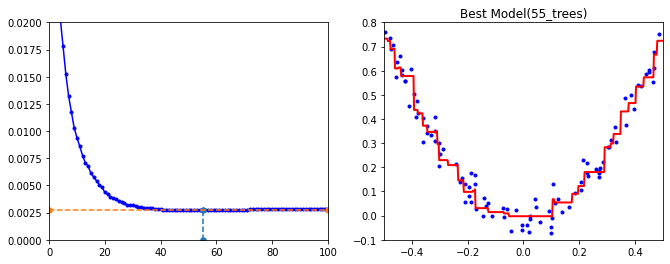

In [114]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(errors,'b.-')
#画出最小的那两条线
plt.plot([best_n_estimators,best_n_estimators],[0,min_error],'h--')
plt.plot([0,100],[min_error,min_error],'h--')
plt.axis([0,100,0,0.02])

plt.subplot(122)
plot_predictions([gbr_best],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title('Best Model(%d_trees)'%best_n_estimators)

### 早停策略

In [118]:
gbr=GradientBoostingRegressor(max_depth=2
                             ,learning_rate=0.1
                             ,random_state=42
                            ,warm_start=True
                             )
error=going_up=0
min_val_error=float('inf')

for n_estimators in range(1,120):
    gbr.fit(X_train,y_train)
    gbr.fit(X_train,y_train)
    y_pred=gbr.predict(X_val)
    val_error=mean_squared_error(y_val,y_pred)
    if val_error < min_val_error:
        min_val_error =val_error
        error_going_up=0
    else:
        error_going_up+=1
        if error_going_up==5:
            break

In [119]:
gbr.n_estimators

100